In [82]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import MCXGate
import qiskit.tools.jupyter
%qiskit_job_watcher 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()
backend = provider.get_backend('simulator_statevector')

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

ibmqfactory.load_account:WARNING:2022-10-25 12:54:19,575: Credentials are already in use. The existing account in the session will be replaced.


In [83]:
#階乘函式
def factorial(num):
    if num == 0:
        return 1
    else:
        a = 1
        for i in range(1,num+1):
            a = a*i
        return a

In [84]:
#定義complete graph大小
graphSize = 5
edgeNumbers = (graphSize)*(graphSize-1)//2
answerNumber = factorial(graphSize-1)//2
groverTimes = int(( 3.14/4*(2**edgeNumbers/answerNumber)**(1/2) )//1)

print(answerNumber, edgeNumbers)

12 10


In [85]:
#choosing state
def choose(a):
    oracle = QuantumCircuit(edgeNumbers, name = 'choose state')
    zGate = MCXGate(edgeNumbers-1)
    oracle.x(a)
    oracle.h([edgeNumbers-1])
    oracle.append(zGate, [i for i in range(edgeNumbers)])
    oracle.h([edgeNumbers-1])
    oracle.x(a)
    oracle.draw(output='mpl')
    return oracle

In [87]:
#define Hamiltonian Cycles
hamiltonianCycles = [[0,6,7,8,9], [1,2,3,4,5], [1,3,4,6,8], [1,4,6,7,9], 
                     [0,1,2,4,7], [1,3,5,7,9], [0,1,3,7,8], [0,2,5,7,9],
                     [2,4,5,6,9], [0,2,3,5,8], [0,2,4,6,8], [3,5,6,8,9]]

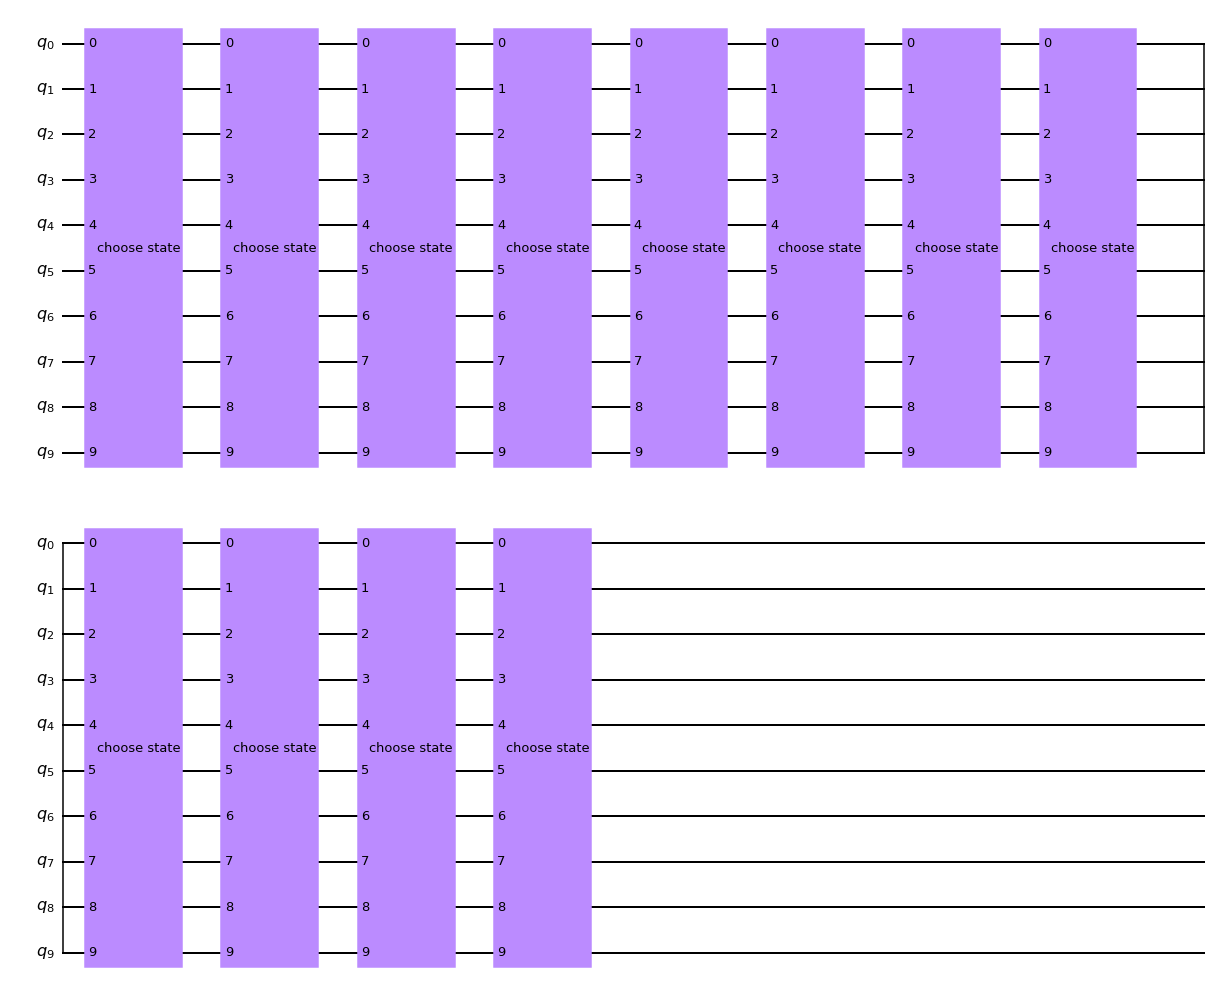

In [88]:
#oracle
oracle = QuantumCircuit(edgeNumbers, name = 'oracle')
for i in range(len(hamiltonianCycles)):
    oracle.append(choose(hamiltonianCycles[i]), [j for j in range(edgeNumbers)])

oracle.draw(output='mpl')

In [89]:
# diffuser
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

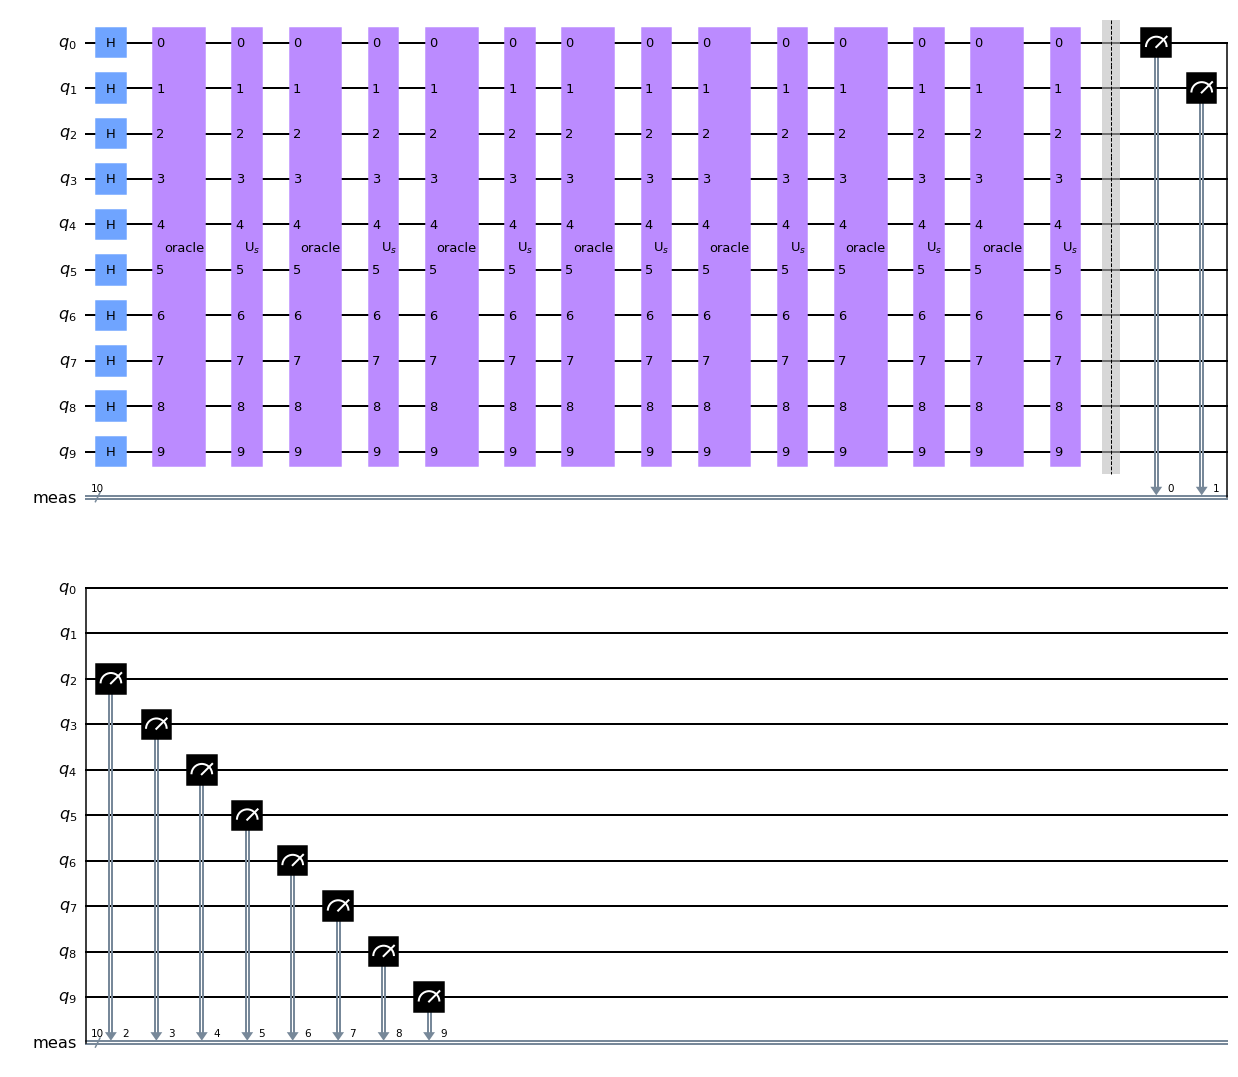

In [90]:
#quantum circuit
qc = QuantumCircuit(edgeNumbers)
for i in range(edgeNumbers):
    qc.h(i)
for j in range(groverTimes):
    qc.append(oracle, [i for i in range(edgeNumbers)])
    qc.append(diffuser(edgeNumbers), [i for i in range(edgeNumbers)])
    
qc.measure_all()
qc.draw(output='mpl')

In [91]:
job = backend.run(transpile(qc, backend=backend), shots=90)
print(job.job_id())

6357dcb10f4ec7254864fbee
